In [1]:
import pandas as pd
import numpy as np
import warnings

from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

In [2]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [3]:
data = pd.read_csv('data/winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [4]:
### Ваш код ###
from sklearn.model_selection import train_test_split

columns = list(data.columns)
columns.remove('quality')

X = data[columns]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RANDOM_STATE)

display((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

((1119, 11), (480, 11), (1119,), (480,))

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [5]:
### Ваш код ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

bagging = BaggingClassifier(dt, n_estimators=100, random_state=RANDOM_STATE)
bagging.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

acc_DT = accuracy_score(y_test, dt.predict(X_test))
acc_Bagging = accuracy_score(y_test, bagging.predict(X_test))
acc_RF = accuracy_score(y_test, rf.predict(X_test))

results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]

display(results)

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.558333
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.670833


**Вывод:**

Классификатор RandomForestClassifier дает лучший результат по справнению с классификатором BaggingClassifier. Оба классификатора RandomForestClassifier и BaggingClassifier дают лучший результат по сравнению с DecisionTreeClassifier.

3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



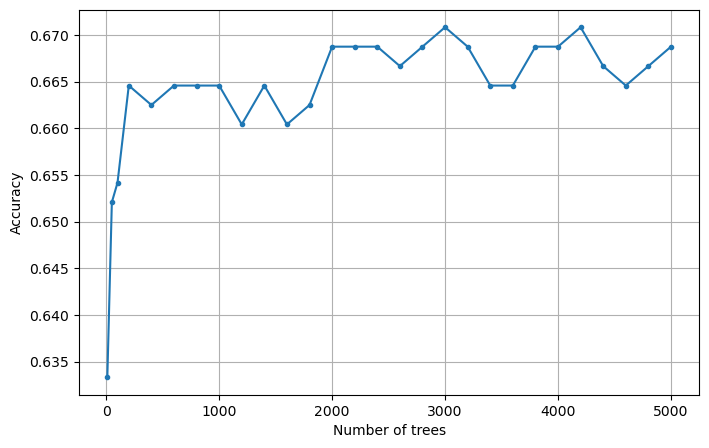

In [6]:
### Ваш код ###
n_trees = [10, 50, 100] + list(range(200, 5000+1, 200))
acc_scores = []
for n in n_trees:
    rf = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    acc_scores.append(acc)
    
plt.figure(figsize=(8, 5))
plt.plot(n_trees, acc_scores, marker='.')
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

**Вывод:**

При увеличении количества деревьев от 10 до 200 наблюдается сильное увеличение значения метрики accuracy. Дальнейшее увеличение количества деревьев от 200 до 5000 не сильно увеличивает значение метрики.

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [7]:
### Ваш код ###
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Ошибка при вызове xgb.fit(X_train, y_train):
# ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [3 4 5 6 7 8]
# Решение:
# https://stackoverflow.com/questions/71996617/invalid-classes-inferred-from-unique-values-of-y-expected-0-1-2-3-4-5-got

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.7, random_state=RANDOM_STATE)

# display((X_train.shape, X_test.shape, y_train.shape, y_test.shape))

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

acc_sklearn = cross_val_score(gb, X, y_encoded, scoring='accuracy').mean()
acc_xgboost = cross_val_score(xgb, X, y_encoded, scoring='accuracy').mean()

results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]

display(results[3:5])

,model,task,accuracy
3,GradientBoostingClassifier,task4,0.560349
4,XGBClassifier,task4,0.547234


**Вывод:**

Градиентный бустинг с параметрами по умолчанию из библиотеки sklearn немного лучше градиентного бустинга с параметрами по умолчанию из библиотеки xgboost.

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [8]:
### Ваш код ###
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [1, 2, 3, 4, 5],
}

gb_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, cv=3, n_jobs=6)
gb_cv.fit(X_train, y_train)

xgb_cv = GridSearchCV(XGBClassifier(), param_grid=parameters, cv=3, n_jobs=6)
xgb_cv.fit(X_train, y_train)

best_params_sklearn = gb_cv.best_params_
print('Параметры лучшей модели sklearn:')
for key, value in best_params_sklearn.items():
    print(f'  {key}: {value}')

best_params_xgboost = xgb_cv.best_params_
print('Параметры лучшей модели xgboost:')
for key, value in best_params_xgboost.items():
    print(f'  {key}: {value}')

acc_sklearn_cv = accuracy_score(y_test, gb_cv.predict(X_test))
acc_xgboost_cv = accuracy_score(y_test, xgb_cv.predict(X_test))

results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

display(results[results['task'].isin(['task4', 'task5'])])

Параметры лучшей модели sklearn:
  learning_rate: 0.2
  max_depth: 5
  n_estimators: 300
Параметры лучшей модели xgboost:
  learning_rate: 0.1
  max_depth: 4
  n_estimators: 300


,model,task,accuracy
3,GradientBoostingClassifier,task4,0.560349
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.639583
6,XGBClassifier_CV,task5,0.650000


**Вывод:**

С подобранными параметрами градиентный бустинг из библиотеки xgboost дает лучший результат метрики accuracy по сравнению с градиентным бустингом из библиотеки sklearn.

6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [9]:
### Ваш код ###
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

cb = CatBoostClassifier(verbose=False)
cb.fit(X_train, y_train)

acc_lightgbm = cross_val_score(lgbm, X, y_encoded, scoring='accuracy').mean()
acc_catboost = cross_val_score(cb, X, y_encoded, scoring='accuracy').mean()

results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

display(results[results['task'].isin(['task4', 'task6'])])

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


,model,task,accuracy
3,GradientBoostingClassifier,task4,0.560349
4,XGBClassifier,task4,0.547234
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976


**Вывод:**

Градиентный бустинг с параметрами по умолчанию из библиотеки sklearn имеет лучшее значение метрики accuracy. Далее идут алгоритмы из библиотеки lightgbm, xgboost и catboost.

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [10]:
### Ваш код ###
lgbm_cv = GridSearchCV(LGBMClassifier(), param_grid=parameters, cv=3, n_jobs=6)
lgbm_cv.fit(X_train, y_train)

cb_cv = GridSearchCV(CatBoostClassifier(verbose=False), param_grid=parameters, cv=3, n_jobs=6)
cb_cv.fit(X_train, y_train)

best_params_lightgbm = lgbm_cv.best_params_
print('Параметры лучшей модели lightgbm:')
for key, value in best_params_lightgbm.items():
    print(f'  {key}: {value}')

best_params_catboost = cb_cv.best_params_
print('Параметры лучшей модели catboost:')
for key, value in best_params_catboost.items():
    print(f'  {key}: {value}')

acc_lightgbm_cv = accuracy_score(y_test, lgbm_cv.predict(X_test))
acc_catboost_cv = accuracy_score(y_test, cb_cv.predict(X_test))

results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

display(results[results['task'].isin(['task5', 'task7'])])

Параметры лучшей модели lightgbm:
  learning_rate: 0.1
  max_depth: 3
  n_estimators: 300
Параметры лучшей модели catboost:
  learning_rate: 0.2
  max_depth: 4
  n_estimators: 300


,model,task,accuracy
5,GradientBoostingClassifier_CV,task5,0.639583
6,XGBClassifier_CV,task5,0.650000
9,LGBMClassifier_CV,task7,0.635417
10,CatBoostClassifier_CV,task7,0.641667


**Вывод:**

С подобранными параметрами градиентный бустинг из библиотеки xgboost дает лучший результат метрики accuracy. Далее идут алгоритмы из библиотеки catboost, sklearn и lightgbm.

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [11]:
### Ваш код ###
import optuna
import optuna.integration.xgboost as optuna_xgboost

# print(optuna.__version__)

optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    parameters = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 1, 5),
    }
    
    # Fit the model
    optuna_model = XGBClassifier(**parameters)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy
    
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params_xgboost_optuna = study.best_trial.params
print('Параметры лучшей модели xgboost:')
for key, value in best_params_xgboost_optuna.items():
    print(f'  {key}: {value}')

xgb = XGBClassifier(**best_params_xgboost_optuna)
xgb.fit(X_train, y_train)

acc_xgboost_optuna = accuracy_score(y_test, xgb.predict(X_test))

results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

display(results[results['task'].isin(['task5', 'task8'])])

Параметры лучшей модели xgboost:
  learning_rate: 0.23986773180961415
  n_estimators: 119
  max_depth: 5


,model,task,accuracy
5,GradientBoostingClassifier_CV,task5,0.639583
6,XGBClassifier_CV,task5,0.650000
11,XGBClassifier_optuna,task8,0.675000


**Вывод:**

Подбор параметров с помощью optuna работает быстрее алгоритма GridSearchCV из библиотеки sklearn. С подобранными параметрами, с помощью optuna, градиентный бустинг из библиотеки xgboost дает самый лучший результат метрики accuracy.

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [12]:
### Ваш код ###
from sklearn.ensemble import StackingClassifier

estimators = [
    ('GradientBoostingClassifier', GradientBoostingClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('LGBMClassifier', LGBMClassifier()),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False)),
]

stacking = StackingClassifier(estimators)
stacking.fit(X_train, y_train)

acc_stacking_default = accuracy_score(y_test, stacking.predict(X_test))

results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

display(results[12:13])

,model,task,accuracy
12,Stacking default,task9,0.672917


**Вывод:**

Стэкинг 4-х алгоритмов градиентного бустинга с базовыми параметрами показал высокий результат метрики accuracy. Результат получился лучше алгоритма XGBClassifier из библиотеки xgboost с подобранными параметрами (подбор параметров осуществлялся с помощью optuna).

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [13]:
### Ваш код ###
estimators = [
    ('GradientBoostingClassifier', GradientBoostingClassifier(**gb_cv.best_params_)),
    ('XGBClassifier', XGBClassifier(**study.best_trial.params)),
    ('LGBMClassifier', LGBMClassifier(**lgbm_cv.best_params_)),
    ('CatBoostClassifier', CatBoostClassifier(verbose=False, **cb_cv.best_params_)),
]

stacking = StackingClassifier(estimators)
stacking.fit(X_train, y_train)

acc_stacking = accuracy_score(y_test, stacking.predict(X_test))

results.loc[13] = ['Stacking', 'task10', acc_stacking]

display(results[13:14])

,model,task,accuracy
13,Stacking,task10,0.6625


**Вывод:**

Стэкинг 4-х алгоритмов градиентного бустинга с оптимальными параметрами оказался немного хуже чем тот же самый алгоритм стэкинга, но с базовыми параметрами для алогритмов градиентного бустинга.

In [14]:
results

,model,task,accuracy
0,DecisionTreeClassifier,task2,0.558333
1,BaggingClassifier,task2,0.641667
2,RandomForestClassifier,task2,0.670833
3,GradientBoostingClassifier,task4,0.560349
4,XGBClassifier,task4,0.547234
5,GradientBoostingClassifier_CV,task5,0.639583
6,XGBClassifier_CV,task5,0.650000
7,LGBMClassifier,task6,0.557247
8,CatBoostClassifier,task6,0.545976
9,LGBMClassifier_CV,task7,0.635417
